# Training final models on full dataset

In [28]:
import os
import torch

from datetime import datetime
from torchvision import transforms

import amphibian.preprocess.preprocessing as preproc

from amphibian.fetch.reader import AmphibianReader
from amphibian.preprocess.train_test_split import TrainTestSplit
from amphibian.architectures import SoftmaxRegressionModel, RNNModel, LSTMModel, AttentionModel
from amphibian.train import SingleTrainer
from amphibian.visual import ConfusionMatrix, MAVI

In [23]:
os.makedirs('./data/model_pickles')

Initialize AmphibianReader

In [10]:
ar = AmphibianReader('data/all_values/banking',
                     datetime(2010, 7, 16),
                     datetime(2018, 6, 10))

_ = ar.create_torch()

In [13]:
ar.torch['AMERICA'].shape

torch.Size([2057, 6, 10])

In [15]:
1 - 110/2057

0.946524064171123

In [17]:
1 - 111/2057

0.9460379192999514

Initialize train_test_splits

In [48]:
train_test_splits = [TrainTestSplit(ar, input_reg='ASIA_PACIFIC', pred_reg='EMEIA', int_start=0, int_end=ar.torch['AMERICA'].shape[0], train_size=0.9465),
                     TrainTestSplit(ar, input_reg='ASIA_PACIFIC', pred_reg='AMERICA', int_start=0, int_end=ar.torch['AMERICA'].shape[0], train_size=0.9465),
                     TrainTestSplit(ar, input_reg='EMEIA', pred_reg='AMERICA', int_start=0, int_end=ar.torch['AMERICA'].shape[0], train_size=0.9465)]

## SoftmaxRegressionModel

Parse parameters

In [21]:
softmax_regression_params = 
learning_rate = softmax_regression_params.pop('learning_rate')
batch_size = softmax_regression_params['batch_size']
seq_len = softmax_regression_params['seq_len']
model_params = {**softmax_regression_params, 
                **{'input_size': 60,
                   'n_outputs': 3,
                   'max_epochs': 300,
                   'early_stopping_patience': 10}}

SyntaxError: invalid syntax (<ipython-input-21-3536a7e57042>, line 1)

In [ ]:
timeser_datasets = [
    preproc.TimeSeriesDataset(
        tts, int_len=seq_len,
        transform=transforms.Compose([
            preproc.FillNaN(), preproc.Normalizing(),
            preproc.DummyFillNaN(), preproc.Formatting(),
            preproc.FormattingY()
        ])
    )
    for tts in train_test_splits
]

tsds = torch.utils.data.ConcatDataset(timeser_datasets)
vds = torch.utils.data.ConcatDataset(
    [preproc.ValidDataset(td) for td in timeser_datasets]
)

In [ ]:
softmax_regression = SoftmaxRegressionModel(**model_params)
st_softmax = SingleTrainer(softmax_regression, batch_size, learning_rate, max_epochs=100, early_stopping_patience=10)
st_softmax.train(tsds, vds, verbose=False, save_path='./data/model_pickles/softmax_regression.pth')

## RNNModel

Parse parameters

In [40]:
rnn_params = {'learning_rate': 0.003956062, 'batch_size': 32, 'seq_len': 25, 'hidden_size': 8, 'dropout': 0.367072568}
learning_rate = rnn_params.pop('learning_rate')
batch_size = rnn_params['batch_size']
seq_len = rnn_params['seq_len']
model_params = {**rnn_params, 
                **{'input_size': 60,
                   'n_outputs': 3,
                   'num_layers': 2}}

In [41]:
timeser_datasets = [
    preproc.TimeSeriesDataset(
        tts, int_len=seq_len,
        transform=transforms.Compose([
            preproc.FillNaN(), preproc.Normalizing(),
            preproc.DummyFillNaN(), preproc.Formatting(),
            preproc.FormattingY()
        ])
    )
    for tts in train_test_splits
]

tsds = torch.utils.data.ConcatDataset(timeser_datasets)
vds = torch.utils.data.ConcatDataset(
    [preproc.ValidDataset(td) for td in timeser_datasets]
)

In [ ]:
rnn = RNNModel(**model_params)
st_rnn = SingleTrainer(rnn, batch_size, learning_rate, max_epochs=100, early_stopping_patience=10)
st_rnn.train(tsds, vds, verbose=False, save_path='./data/model_pickles/rnn.pth')

## LSTMModel

In [43]:
lstm_params = {'learning_rate': 0.008749082485073683, 'batch_size': 64, 'seq_len': 21, 'hidden_size': 6, 'dropout': 0.4845307361568673}
learning_rate = lstm_params.pop('learning_rate')
batch_size = lstm_params['batch_size']
seq_len = lstm_params['seq_len']
model_params = {**lstm_params, 
                **{'input_size': 60,
                   'n_outputs': 3,
                   'num_layers': 2}}

In [44]:
timeser_datasets = [
    preproc.TimeSeriesDataset(
        tts, int_len=seq_len,
        transform=transforms.Compose([
            preproc.FillNaN(), preproc.Normalizing(),
            preproc.DummyFillNaN(), preproc.Formatting(),
            preproc.FormattingY()
        ])
    )
    for tts in train_test_splits
]

tsds = torch.utils.data.ConcatDataset(timeser_datasets)
vds = torch.utils.data.ConcatDataset(
    [preproc.ValidDataset(td) for td in timeser_datasets]
)

d:\gsn-projekt\venv\lib\site-packages\torch\tensor.py:339: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")
d:\gsn-projekt\venv\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [ ]:
lstm = LSTMModel(**model_params)
st_lstm = SingleTrainer(lstm, batch_size, learning_rate, max_epochs=100, early_stopping_patience=10)
st_lstm.train(tsds, vds, verbose=False, save_path='./data/model_pickles/lstm.pth')

## AttentionModel

In [52]:
attn_params = {'learning_rate': 0.004139811848108426, 'batch_size': 64, 'seq_len': 24, 'hidden_size': 10, 'dropout': 0.0067987573823941605}
learning_rate = attn_params.pop('learning_rate')
batch_size = attn_params['batch_size']
seq_len = attn_params['seq_len']
model_params = {**attn_params, 
                **{'input_size': 60,
                   'n_outputs': 3,
                   'num_layers': 2,
                   'recurrent_type': 'lstm',
                   'alignment': 'ffnn'}}

In [53]:
timeser_datasets = [
    preproc.TimeSeriesDataset(
        tts, int_len=seq_len,
        transform=transforms.Compose([
            preproc.FillNaN(), preproc.Normalizing(),
            preproc.DummyFillNaN(), preproc.Formatting(),
            preproc.FormattingY()
        ])
    )
    for tts in train_test_splits
]

tsds = torch.utils.data.ConcatDataset(timeser_datasets)
vds = torch.utils.data.ConcatDataset(
    [preproc.ValidDataset(td) for td in timeser_datasets]
)

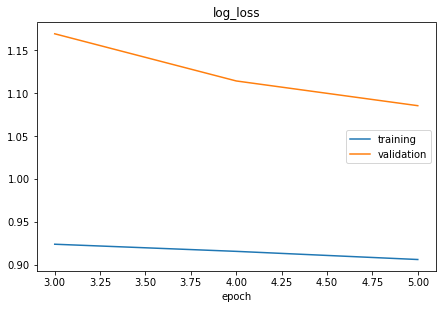

log_loss:
training   (min:    0.906, max:    0.995, cur:    0.906)
validation (min:    1.043, max:    1.169, cur:    1.085)


In [ ]:
attn = AttentionModel(**model_params)
st_attn = SingleTrainer(attn, batch_size, learning_rate, max_epochs=100, early_stopping_patience=10)
st_attn.train(tsds, vds, verbose=False, save_path='./data/model_pickles/attention.pth')